# EDA | Разведочный анализ данных

- [Диаграммы с накоплением для таргета](#Диаграммы-с-накоплением-для-таргета)
- [Диаграммы с накоплением для фичей](#Диаграммы-с-накоплением-для-фичей)

In [1]:
import os

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
DATA_PATH = os.path.join('data', 'transactions')
TARGET_PATH = os.path.join('data', 'beeline_antispam_hakaton_id_samples.csv')

In [3]:
TARGETS = [0., 1., 2., 3., 4.]
LABELS = [
    'не спам',
    'небольшие полезные ИП / малые бизнесы',
    'организации',
    'мобильная карусель',
    'чёрные спаммеры и мошенники',
]
COLORS = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:gray']

# Диаграммы с накоплением для таргета

In [4]:
data_paths = [os.path.join(DATA_PATH, file_name) for file_name in os.listdir(DATA_PATH)]

targets = pd.read_csv(TARGET_PATH, dtype={
    'id': 'uint32',
    'target': 'float32',
    'split': 'category',
})
targets.head()

,id,target,split
0,196535,NaN,test
1,63075900,2.0,train
2,35233935,2.0,train
3,23557360,4.0,train
4,78926486,NaN,test


In [5]:
targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46235 entries, 0 to 46234
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      46235 non-null  uint32  
 1   target  36942 non-null  float32 
 2   split   46235 non-null  category
dtypes: category(1), float32(1), uint32(1)
memory usage: 406.5 KB


In [28]:
transactions_a = pd.DataFrame()
transactions_b = pd.DataFrame()
ids_a = pd.DataFrame()
ids_b = pd.DataFrame()
for data_path in data_paths:
    date = pd.to_datetime(
        data_path.replace(os.path.join('data', 'transactions', 'time_key='), '').replace('.csv', '').replace('-', '.'),
        format='%Y-%m-%d',
    )
    call_transactions = (
        # читаем `id_a` и `id_b`
        pd.read_csv(data_path, usecols=['id_a', 'id_b'], dtype={'id_a': 'uint32', 'id_b': 'uint32'})
        # добавляем `target_a` и `split_a` слиянием
        .merge(targets, left_on='id_a', right_on='id', how='left')
        .rename(columns={'target': 'target_a', 'split': 'split_a'})
        .drop('id', axis=1)
        # добавляем `target_b` и `split_b` слиянием
        .merge(targets, left_on='id_b', right_on='id', how='left')
        .rename(columns={'target': 'target_b', 'split': 'split_b'})
        .drop('id', axis=1)
    )
    # распределения для отдельных транзакций
    # для id_a    
    row = pd.DataFrame([[
        call_transactions.loc[call_transactions['target_a'] == 0.].shape[0],
        call_transactions.loc[call_transactions['target_a'] == 1.].shape[0],
        call_transactions.loc[call_transactions['target_a'] == 2.].shape[0],
        call_transactions.loc[call_transactions['target_a'] == 3.].shape[0],
        call_transactions.loc[call_transactions['target_a'] == 4.].shape[0],
        call_transactions.loc[call_transactions['split_a'] == 'test'].shape[0],
        call_transactions['split_a'].isna().sum(),
    ]],
        columns=['не спам', 'небольшие полезные ИП / малые бизнесы', 'организации', 'мобильная карусель',
                 'чёрные спамеры и мошенники', 'test', 'неразмеченные'],
        index=[date],
    )
    transactions_a = pd.concat([transactions_a, row])
    # для id_b
    row = pd.DataFrame([[
        call_transactions.loc[call_transactions['target_b'] == 0.].shape[0],
        call_transactions.loc[call_transactions['target_b'] == 1.].shape[0],
        call_transactions.loc[call_transactions['target_b'] == 2.].shape[0],
        call_transactions.loc[call_transactions['target_b'] == 3.].shape[0],
        call_transactions.loc[call_transactions['target_b'] == 4.].shape[0],
        call_transactions.loc[call_transactions['split_b'] == 'test'].shape[0],
        call_transactions['split_b'].isna().sum(),
    ]],
        columns=[
            'не спам',
            'небольшие полезные ИП / малые бизнесы',
            'организации',
            'мобильная карусель',
            'чёрные спамеры и мошенники',
            'test',
            'неразмеченные',
        ],
        index=[date],
    )
    transactions_b = pd.concat([transactions_b, row])
    # распределение уникальных id
    # для id_a
    row = pd.DataFrame([[
        len(call_transactions.loc[call_transactions['target_a'] == 0., 'id_a'].unique()),
        len(call_transactions.loc[call_transactions['target_a'] == 1., 'id_a'].unique()),
        len(call_transactions.loc[call_transactions['target_a'] == 2., 'id_a'].unique()),
        len(call_transactions.loc[call_transactions['target_a'] == 3., 'id_a'].unique()),
        len(call_transactions.loc[call_transactions['target_a'] == 4., 'id_a'].unique()),
        len(call_transactions.loc[call_transactions['split_a'] == 'test', 'id_a'].unique()),
        len(call_transactions.loc[call_transactions['split_a'].isna(), 'id_a'].unique()),
    ]],
        columns=[
            'не спам',
            'небольшие полезные ИП / малые бизнесы',
            'организации',
            'мобильная карусель',
            'чёрные спамеры и мошенники',
            'test',
            'неразмеченные',
        ],
        index=[date],
    )
    ids_a = pd.concat([ids_a, row])
    # для id_b
    row = pd.DataFrame([[
        len(call_transactions.loc[call_transactions['target_b'] == 0., 'id_b'].unique()),
        len(call_transactions.loc[call_transactions['target_b'] == 1., 'id_b'].unique()),
        len(call_transactions.loc[call_transactions['target_b'] == 2., 'id_b'].unique()),
        len(call_transactions.loc[call_transactions['target_b'] == 3., 'id_b'].unique()),
        len(call_transactions.loc[call_transactions['target_b'] == 4., 'id_b'].unique()),
        len(call_transactions.loc[call_transactions['split_b'] == 'test', 'id_b'].unique()),
        len(call_transactions.loc[call_transactions['split_b'].isna(), 'id_b'].unique()),
    ]],
        columns=[
            'не спам',
            'небольшие полезные ИП / малые бизнесы',
            'организации',
            'мобильная карусель',
            'чёрные спамеры и мошенники',
            'test',
            'неразмеченные',
        ],
        index=[date],
    )
    ids_b = pd.concat([ids_b, row])

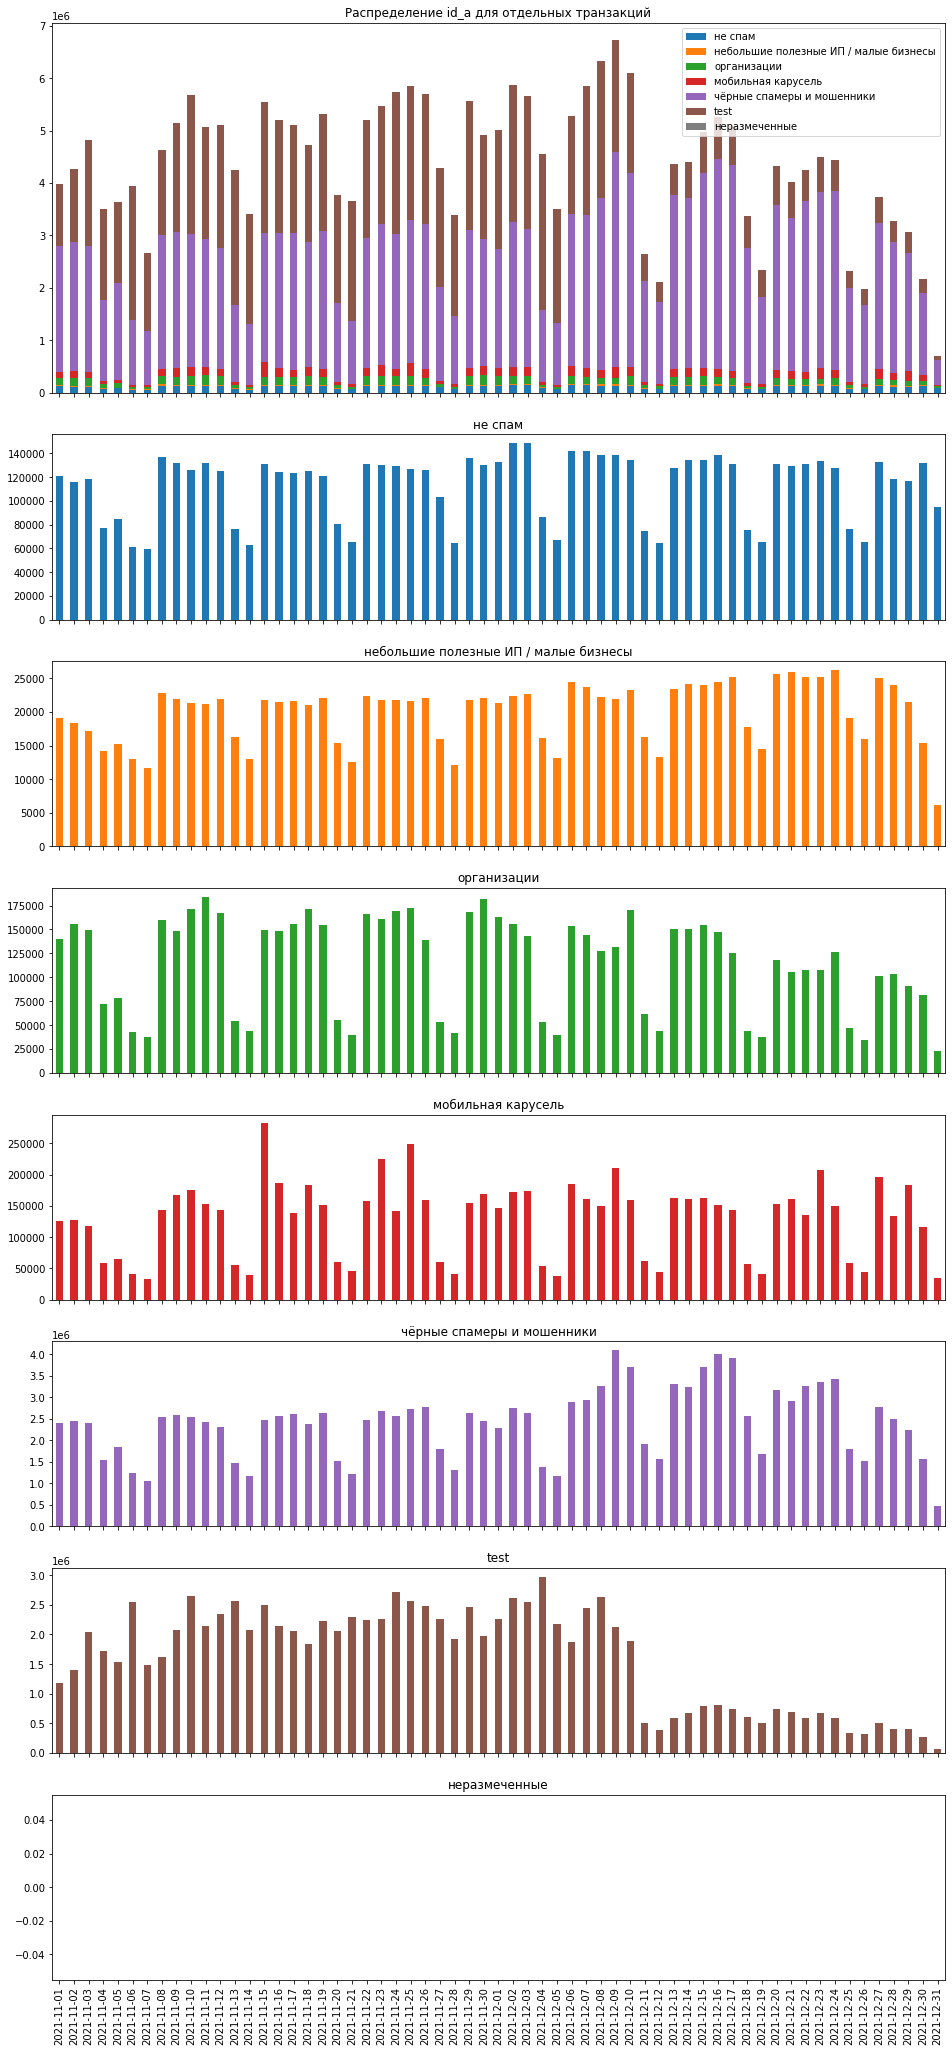

In [29]:
fig, axes = plt.subplots(8, 1, figsize=(16, 36), gridspec_kw={'height_ratios': [2, 1, 1, 1, 1, 1, 1, 1]}, sharex=True)

transactions_a.plot(kind='bar', stacked=True, ax=axes[0], color=COLORS[:7], title='Распределение id_a для отдельных транзакций')
transactions_a['не спам'].plot(kind='bar', ax=axes[1], color=COLORS[0], title='не спам')
transactions_a['небольшие полезные ИП / малые бизнесы'].plot(kind='bar', ax=axes[2], color=COLORS[1], title='небольшие полезные ИП / малые бизнесы')
transactions_a['организации'].plot(kind='bar', ax=axes[3], color=COLORS[2], title='организации')
transactions_a['мобильная карусель'].plot(kind='bar', ax=axes[4], color=COLORS[3], title='мобильная карусель')
transactions_a['чёрные спамеры и мошенники'].plot(kind='bar', ax=axes[5], color=COLORS[4], title='чёрные спамеры и мошенники')
transactions_a['test'].plot(kind='bar', ax=axes[6], color=COLORS[5], title='test')
transactions_a['неразмеченные'].plot(kind='bar', ax=axes[7], color=COLORS[6], title='неразмеченные')
axes[7].set_xticklabels(transactions_a.index.format())

plt.show()

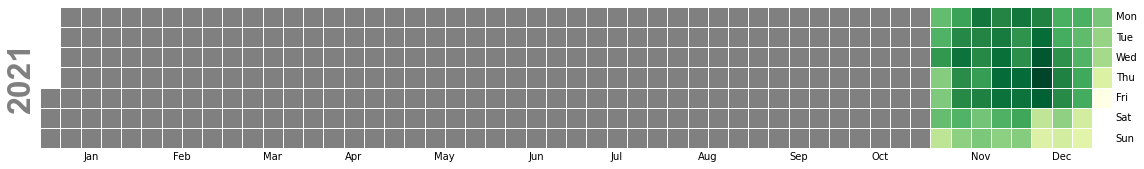

In [30]:
import calmap

# TODO: здесь не работают почему-то параметры `monthlabels` и `monthticks`
# может стоит залезть в исходный код
# https://pythonhosted.org/calmap/
# хотелось вывести только 2 необходимых месяца
_ = calmap.calendarplot(
    a.sum(axis=1),
    fig_kws={'figsize': (16, 10)},
    fillcolor='gray',
    cmap='YlGn',
)

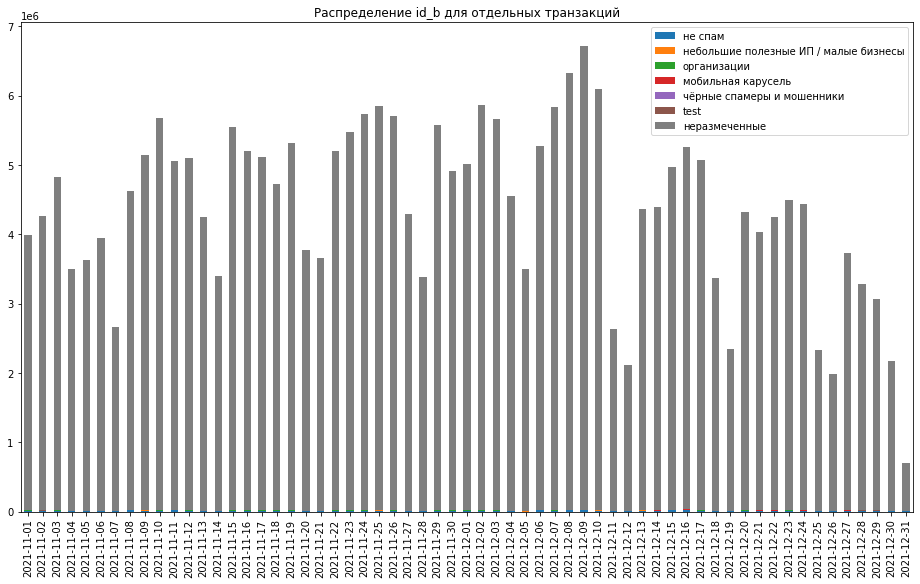

In [31]:
fig, ax = plt.subplots(figsize=(16, 9))

transactions_b.plot(kind='bar', stacked=True, ax=ax, color=COLORS[:7], title='Распределение id_b для отдельных транзакций')
ax.set_xticklabels(transactions_b.index.format())

plt.show()

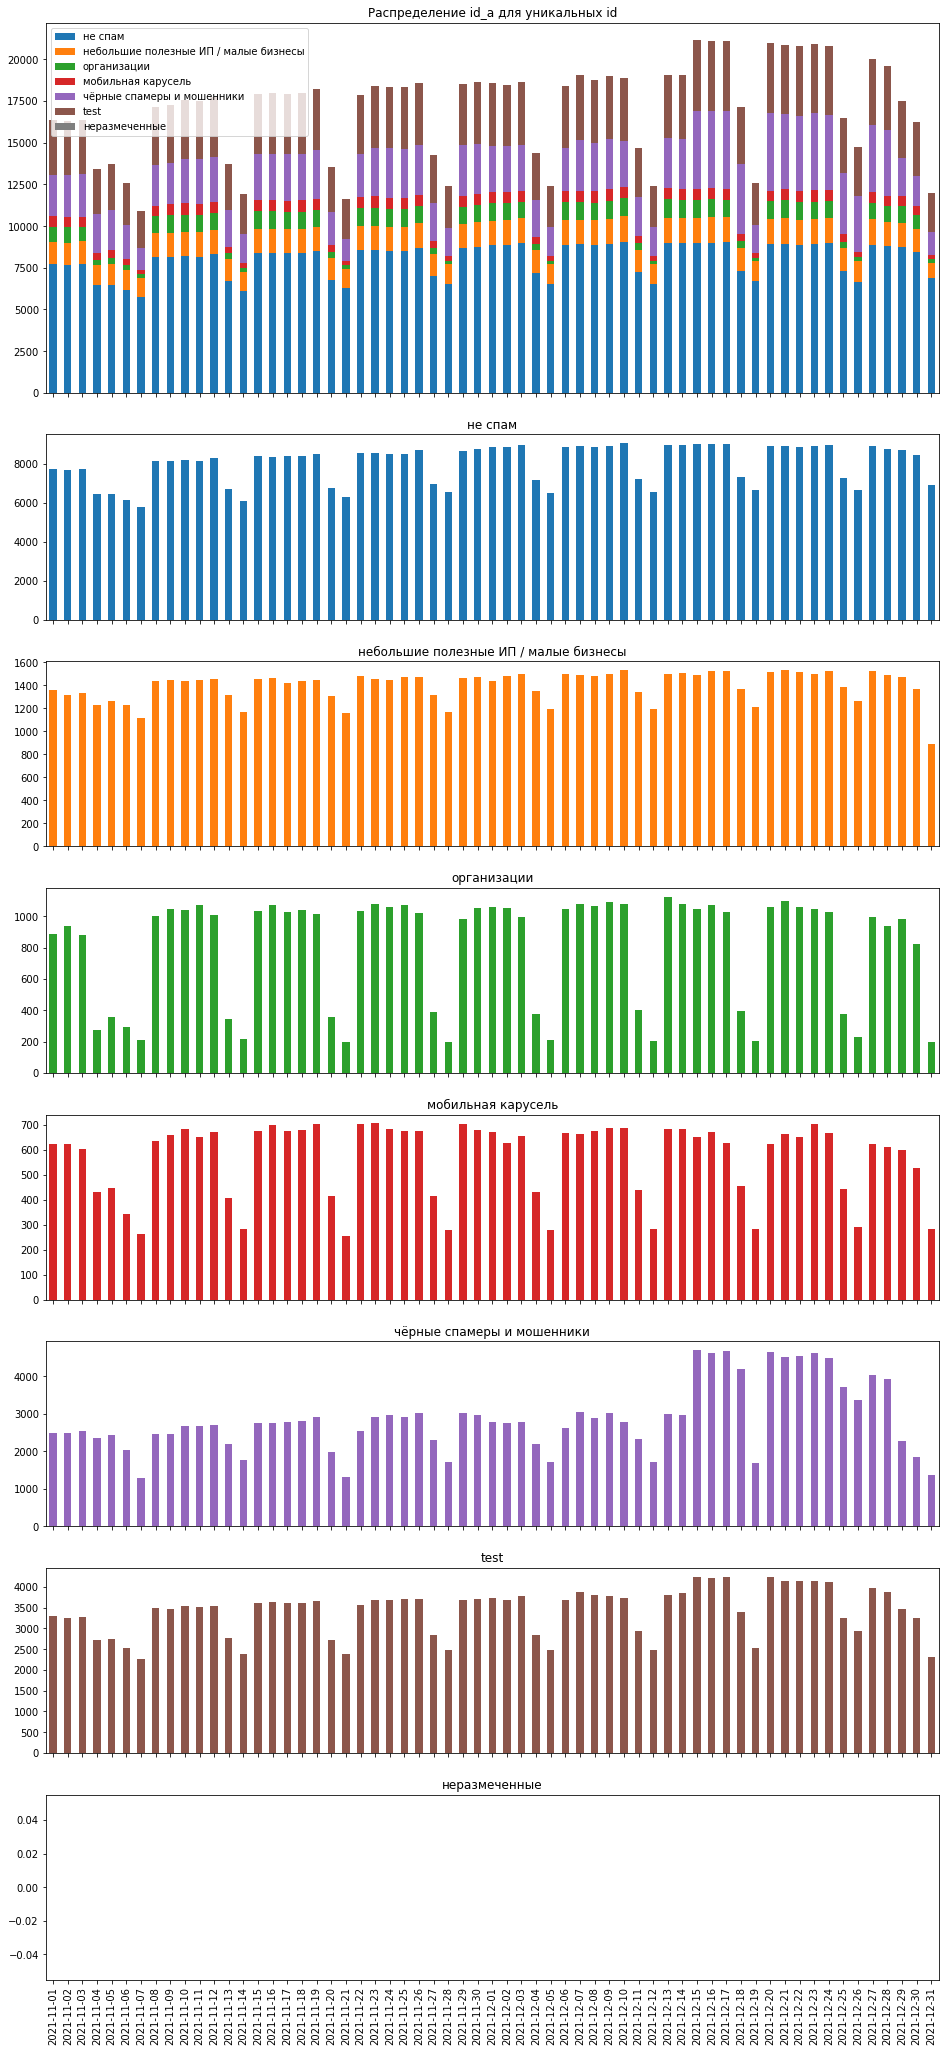

In [33]:
fig, axes = plt.subplots(8, 1, figsize=(16, 36), gridspec_kw={'height_ratios': [2, 1, 1, 1, 1, 1, 1, 1]}, sharex=True)

ids_a.plot(kind='bar', stacked=True, ax=axes[0], color=COLORS[:7], title='Распределение id_a для уникальных id')
ids_a['не спам'].plot(kind='bar', ax=axes[1], color=COLORS[0], title='не спам')
ids_a['небольшие полезные ИП / малые бизнесы'].plot(kind='bar', ax=axes[2], color=COLORS[1], title='небольшие полезные ИП / малые бизнесы')
ids_a['организации'].plot(kind='bar', ax=axes[3], color=COLORS[2], title='организации')
ids_a['мобильная карусель'].plot(kind='bar', ax=axes[4], color=COLORS[3], title='мобильная карусель')
ids_a['чёрные спамеры и мошенники'].plot(kind='bar', ax=axes[5], color=COLORS[4], title='чёрные спамеры и мошенники')
ids_a['test'].plot(kind='bar', ax=axes[6], color=COLORS[5], title='test')
ids_a['неразмеченные'].plot(kind='bar', ax=axes[7], color=COLORS[6], title='неразмеченные')
axes[7].set_xticklabels(ids_a.index.format())

plt.show()

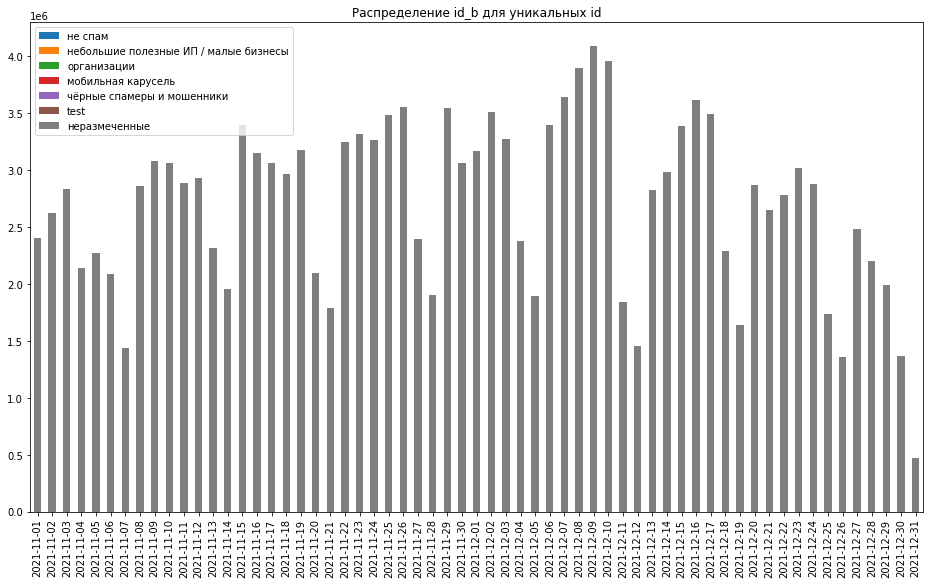

In [34]:
fig, ax = plt.subplots(figsize=(16, 9))

ids_b.plot(kind='bar', stacked=True, ax=ax, color=COLORS[:7], title='Распределение id_b для уникальных id')
ax.set_xticklabels(ids_b.index.format())

plt.show()